In [21]:
import pandas as pd
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import KFold
from sympy.utilities.exceptions import ignore_warnings
from torch.optim.lr_scheduler import StepLR
from collections import deque
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("updated_data.csv")

## Analyze and Clean Dataset

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  1200 non-null   float64
 1   name                     1211 non-null   str    
 2   age                      1200 non-null   float64
 3   gender                   1200 non-null   str    
 4   target_gender            1200 non-null   str    
 5   location                 1200 non-null   str    
 6   occupation               1200 non-null   str    
 7   anxiety                  1200 non-null   float64
 8   avoidance                1200 non-null   float64
 9   Lifestyle                1200 non-null   str    
 10  Arts & Creativity        1200 non-null   str    
 11  Music                    1200 non-null   str    
 12  Movies & Shows           1200 non-null   str    
 13  Intellectual & Learning  1200 non-null   str    
 14  Food & Drinks            1200 non-n

In [6]:
df.head()

,user_id,name,age,gender,target_gender,location,occupation,anxiety,avoidance,Lifestyle,Arts & Creativity,Music,Movies & Shows,Intellectual & Learning,Food & Drinks,Sports & Outdoor,Gaming & Digital,Travel & Culture,Personality & Values,Relationship Intent
0,1.0,Nethmi Bandara,37.0,Female,Male,Gampaha,Construction Worker,4.09,6.57,"[""Night Owl"", ""Meditation""]","[""Filmmaking"", ""Graphic Design"", ""Poetry"", ""In...","[""Indie""]","[""Documentaries"", ""Horror"", ""Anime"", ""Sitcoms""]","[""Self-Improvement""]","[""Street Food"", ""Spicy Food"", ""Cooking"", ""Coff...","[""Surfing"", ""Football"", ""Adventure Sports""]","[""Web3"", ""Crypto""]","[""Museums"", ""Beaches"", ""Mountains"", ""Cultural ...","[""Atheist"", ""Feminist""]","[""Open Relationship""]"
1,2.0,Malith,32.0,Male,Female,Kandy,Accountant,3.96,4.88,"[""Traveling"", ""Vegan"", ""Digital Nomad""]","[""Interior Design""]","[""Singing"", ""K-Pop"", ""Rock""]","[""Horror"", ""Documentaries"", ""K-Dramas""]","[""Science"", ""Books & Reading"", ""Self-Improveme...","[""Street Food"", ""Spicy Food"", ""Craft Beer"", ""F...","[""Cricket"", ""Swimming"", ""Hiking"", ""Surfing""]","[""Console Gaming"", ""Board Games"", ""Mobile Gami...","[""Museums"", ""Languages""]","[""Feminist"", ""Family-Oriented"", ""Career-Focuse...","[""Marriage""]"
2,3.0,Isuru,25.0,Male,Female,Gampaha,Accountant,2.63,4.24,"[""Early Bird""]","[""Poetry""]","[""Hip-Hop"", ""EDM""]","[""Sci-Fi""]","[""Technology"", ""History"", ""Science""]","[""Coffee"", ""Cooking"", ""Baking"", ""Street Food""]","[""Surfing"", ""Cycling"", ""Swimming"", ""Football""]","[""Mobile Gaming"", ""Dungeons & Dragons""]","[""Beaches""]","[""Career-Focused"", ""Family-Oriented"", ""Spiritu...","[""Long-Term Relationship""]"
3,4.0,Hashan,25.0,Male,Female,Badulla,Accountant,4.67,1.37,"[""Pet Lover"", ""Meditation"", ""Vegan""]","[""Filmmaking""]","[""Rock"", ""EDM"", ""Singing""]","[""Horror"", ""Sci-Fi""]","[""History"", ""AI & Machine Learning"", ""Technolo...","[""Street Food""]","[""Basketball"", ""Hiking"", ""Surfing"", ""Cycling""]","[""VR"", ""Console Gaming""]","[""Cultural Festivals"", ""Backpacking"", ""Road Tr...","[""Environmentalist"", ""Politically Active""]","[""Open Relationship""]"
4,5.0,Supun,23.0,Male,Female,Kandy,Doctor,3.45,1.17,"[""Traveling"", ""Pet Lover""]","[""Filmmaking"", ""Interior Design"", ""DIY & Crafts""]","[""K-Pop"", ""Pop""]","[""Thriller"", ""Sitcoms"", ""Documentaries""]","[""Self-Improvement"", ""Psychology""]","[""Wine"", ""Baking"", ""Craft Beer""]","[""Hiking"", ""Basketball"", ""Surfing"", ""Camping""]","[""Board Games"", ""Console Gaming"", ""VR""]","[""Luxury Travel"", ""Museums"", ""Road Trips""]","[""Politically Active"", ""Spiritual""]","[""Casual Dating""]"


In [7]:
df.describe()

,user_id,age,anxiety,avoidance
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,28.810000,3.470083,3.484917
std,346.554469,6.666403,1.392839,1.363520
min,1.000000,18.000000,1.000000,1.000000
25%,300.750000,23.000000,2.507500,2.497500
50%,600.500000,29.000000,3.380000,3.485000
75%,900.250000,35.000000,4.410000,4.410000
max,1200.000000,40.000000,7.000000,7.000000


In [8]:
df.isnull().sum()

user_id                    11
name                        0
age                        11
gender                     11
target_gender              11
location                   11
occupation                 11
anxiety                    11
avoidance                  11
Lifestyle                  11
Arts & Creativity          11
Music                      11
Movies & Shows             11
Intellectual & Learning    11
Food & Drinks              11
Sports & Outdoor           11
Gaming & Digital           11
Travel & Culture           11
Personality & Values       11
Relationship Intent        11
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()
df.drop(columns=['name'], inplace=True)

In [10]:
df.tail()

,user_id,age,gender,target_gender,location,occupation,anxiety,avoidance,Lifestyle,Arts & Creativity,Music,Movies & Shows,Intellectual & Learning,Food & Drinks,Sports & Outdoor,Gaming & Digital,Travel & Culture,Personality & Values,Relationship Intent
1195,1196.0,39.0,Male,Female,Colombo,Driver,2.37,1.84,"[""Vegan"", ""Night Owl""]","[""Writing"", ""Painting"", ""Filmmaking"", ""Interio...","[""Classical"", ""EDM"", ""Rock"", ""Pop""]","[""Horror"", ""Anime"", ""Documentaries""]","[""Psychology""]","[""Fine Dining"", ""Baking""]","[""Hiking"", ""Camping""]","[""Web3""]","[""Backpacking"", ""Cultural Festivals"", ""Road Tr...","[""Family-Oriented"", ""Spiritual"", ""Feminist"", ""...","[""Marriage""]"
1196,1197.0,27.0,Male,Female,Colombo,Doctor,1.73,4.23,"[""Vegetarian"", ""Night Owl""]","[""Interior Design"", ""Graphic Design"", ""Poetry""...","[""Playing Instruments""]","[""Romance"", ""Documentaries"", ""Sci-Fi""]","[""Psychology"", ""Books & Reading"", ""AI & Machin...","[""Street Food"", ""Baking""]","[""Cycling""]","[""Console Gaming"", ""Crypto""]","[""Languages"", ""Mountains"", ""Beaches""]","[""Atheist"", ""Spiritual"", ""Family-Oriented"", ""C...","[""Casual Dating""]"
1197,1198.0,33.0,Male,Female,Ratnapura,Doctor,4.29,2.50,"[""Early Bird"", ""Pet Lover""]","[""Poetry"", ""Painting""]","[""Singing""]","[""Sitcoms"", ""K-Dramas"", ""Romance"", ""Thriller""]","[""Philosophy""]","[""Spicy Food"", ""Cooking"", ""Fine Dining"", ""Baki...","[""Cricket"", ""Football"", ""Camping"", ""Basketball""]","[""Dungeons & Dragons"", ""eSports"", ""Board Games...","[""Mountains""]","[""Religious"", ""Family-Oriented"", ""Career-Focus...","[""Marriage""]"
1198,1199.0,32.0,Female,Male,Badulla,Business Owner,3.53,3.58,"[""Vegan"", ""Gym"", ""Vegetarian"", ""Fitness""]","[""Graphic Design"", ""Interior Design""]","[""EDM"", ""Hip-Hop"", ""Jazz""]","[""K-Dramas""]","[""Books & Reading""]","[""Fine Dining"", ""Street Food""]","[""Cricket""]","[""Mobile Gaming"", ""Board Games"", ""eSports""]","[""Museums"", ""Languages"", ""Road Trips""]","[""Family-Oriented"", ""Spiritual"", ""Career-Focus...","[""Long-Term Relationship""]"
1199,1200.0,28.0,Female,Male,Monaragala,Farmer,6.05,6.33,"[""Fitness"", ""Night Owl""]","[""Fashion""]","[""EDM"", ""Pop"", ""Playing Instruments"", ""Hip-Hop""]","[""Thriller"", ""Anime"", ""K-Dramas"", ""Documentari...","[""Self-Improvement""]","[""Baking"", ""Cooking""]","[""Adventure Sports"", ""Swimming"", ""Basketball""]","[""Dungeons & Dragons""]","[""Museums"", ""Beaches"", ""Mountains""]","[""Atheist"", ""Politically Active""]","[""Still Figuring It Out""]"


### Data Preprocessing and Reward System

In [11]:
# We assign strict weights to the 12 categories.
# The RL Agent must learn these priorities organically through trial and error.
CATEGORY_WEIGHTS = {
    "Relationship Intent": 40.0,   # Dealbreaker
    "Personality & Values": 20.0,  # High impact on stability
    "Lifestyle": 15.0,             # Day-to-day friction
    "Intellectual & Learning": 5.0,
    "Food & Drinks": 5.0,
    "Travel & Culture": 5.0,
    "Gaming & Digital": 5.0,
    "Sports & Outdoor": 5.0,
    "Arts & Creativity": 3.0,
    "Music": 2.0,
    "Movies & Shows": 2.0
}
# Total max category points = 107.0

# --- THE MATH TRANSLATORS (Step 2) ---

def calculate_jaccard(list_a, list_b):
    """Calculates the percentage overlap between two lists of text (0.0 to 1.0)"""
    set_a, set_b = set(list_a), set(list_b)
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    if union == 0:
        return 0.0
    return intersection / union

def process_pair(user_a, user_b):
    """
    Takes two raw user rows and returns:
    1. The State Tensor (What the Neural Network sees)
    2. The Reward (How we score the Neural Network's choice)
    """

    # 1. Base Logic Constraints (Hard fails)
    # If gender preferences or locations don't match, immediate negative reward.
    if user_a['target_gender'] != user_b['gender'] or user_b['target_gender'] != user_a['gender']:
        return None, -100.0 # Terrible guess by the Agent

    if user_a['location'] != user_b['location']:
        return None, -50.0  # Long distance penalty

    # 2. Calculate the 11 Category Overlaps
    category_overlaps = {}
    reward_from_interests = 0.0

    for cat, weight in CATEGORY_WEIGHTS.items():
        # Parse the JSON strings back into Python lists
        items_a = json.loads(user_a[cat])
        items_b = json.loads(user_b[cat])

        # Calculate overlap (0.0 to 1.0)
        overlap = calculate_jaccard(items_a, items_b)
        category_overlaps[cat] = overlap

        # Add to the Agent's reward
        reward_from_interests += (overlap * weight)

    # 3. Calculate Psychological Reward (The Core Logic)
    # Reward stability, penalize the Anxious-Avoidant trap
    anx_gap = abs(user_a['anxiety'] - user_b['anxiety'])
    avo_gap = abs(user_a['avoidance'] - user_b['avoidance'])
    trap_metric = (user_a['anxiety'] * user_b['avoidance']) + (user_b['anxiety'] * user_a['avoidance'])

    psych_reward = 50.0 # Base psychological score
    if trap_metric > 35: psych_reward -= 40.0 # Huge penalty for toxic trap
    if user_a['anxiety'] < 3.0 and user_b['anxiety'] < 3.0: psych_reward += 20.0 # Secure bonus

    # Final Reward Calculation
    total_reward = reward_from_interests + psych_reward

    # 4. Build the State Vector (The Neural Network Input)
    # This is a flat array of numbers representing this specific couple
    state_vector = [
        abs(user_a['age'] - user_b['age']) / 10.0, # Normalized age gap
        user_a['anxiety'] / 7.0,                   # Normalize to 0-1
        user_a['avoidance'] / 7.0,
        user_b['anxiety'] / 7.0,
        user_b['avoidance'] / 7.0,
    ]

    # Append the 11 overlap scores to the state
    for cat in CATEGORY_WEIGHTS.keys():
        state_vector.append(category_overlaps[cat])

    # state_vector is now an array of 16 numbers (5 base + 11 categories)
    return np.array(state_vector), total_reward


def simulate_user_interaction(user_a, candidate_b):
    """
    The HIDDEN Environment Simulator.
    Simulates if User A will 'Confirm' or 'Skip' Candidate B based on hidden psychology.
    """
    # 1. Calculate the hidden mathematical score (The Agent won't see this score anymore!)
    state_vector, hidden_score = process_pair(user_a, candidate_b)

    # Hard mismatches (Gender/Location) result in an automatic Skip
    if state_vector is None:
        return None, -1.0 # Reward is -1.0 (SKIP)

    # 2. Convert the hidden score into a Probability of Confirming (0.0 to 1.0)
    # Assuming ~120 was a great score in our old system.
    base_probability = hidden_score / 120.0

    # Cap probability at 95% (Even perfect matches sometimes get skipped)
    # Floor it at 5% (Even bad matches sometimes get confirmed by accident)
    confirm_probability = np.clip(base_probability, 0.05, 0.95)

    # 3. The Stochastic Action (Roll the Dice)
    dice_roll = random.random()

    if dice_roll <= confirm_probability:
        reward = 1.0  # CONFIRM (+1 Reward)
    else:
        reward = -1.0 # SKIP (-1 Reward)

    return state_vector, reward

# --- TEST THE SIMULATOR ---
print("Testing the Confirm/Skip Simulator...")
state, simulated_reward = simulate_user_interaction(df.iloc[0], df.iloc[1])

if simulated_reward == 1.0:
    print("Result: The user hit CONFIRM! (+1 Reward)")
else:
    print("Result: The user hit SKIP! (-1 Reward)")

Testing the Confirm/Skip Simulator...
Result: The user hit SKIP! (-1 Reward)


In [12]:
# --- DEVICE SETUP ---
# Use Apple Silicon GPU (MPS) if available, otherwise fall back to CPU
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [13]:
# --- 1. UPDATED NEURAL NETWORK (16 FEATURES) ---
class MatchmakerDQN(nn.Module):
    def __init__(self):
        super(MatchmakerDQN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(16, 128),  # Fixed input to 16 features!
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

# Initialize Agent, Optimizer, and the new LR Scheduler
agent = MatchmakerDQN().to(device)
optimizer = optim.Adam(agent.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=1500, gamma=0.5) # Cuts learning rate in half every 1500 epochs
criterion = nn.MSELoss()

# --- 2. THE EXPERIENCE REPLAY BUFFER ---
memory = deque(maxlen=10000) # The Agent remembers its last 10,000 matches
BATCH_SIZE = 64

# --- 3. UPDATED HYPERPARAMETERS ---
EPOCHS = 5000
epsilon = 1.0
epsilon_decay = 0.999 # Slower decay: hits 0.05 around epoch 3000 instead of 1500
epsilon_min = 0.05

print(f"Starting True DQN Training with Experience Replay for {EPOCHS} Epochs...")

agent.train()
reward_tracking = []

for epoch in range(EPOCHS):
    # 1. App Session Simulation
    target_idx = random.randint(0, len(df) - 1)
    target_user = df.iloc[target_idx]

    candidates = df[
        (df['user_id'] != target_user['user_id']) &
        (df['gender'] == target_user['target_gender']) &
        (df['target_gender'] == target_user['gender']) &
        (df['location'] == target_user['location'])
    ]
    if len(candidates) == 0: continue

    feed_candidates = candidates.sample(min(10, len(candidates)))
    feed_states, valid_cands = [], []

    for _, cand in feed_candidates.iterrows():
        state, _ = process_pair(target_user, cand)
        if state is not None:
            feed_states.append(state)
            valid_cands.append(cand)

    if not feed_states: continue
    state_tensors = torch.FloatTensor(np.array(feed_states)).to(device)

    # 2. Epsilon-Greedy Action (Explore vs Exploit)
    if random.random() < epsilon:
        chosen_idx = random.randint(0, len(feed_states) - 1)
    else:
        with torch.no_grad(): # Don't calculate gradients just for picking an action
            q_values = agent(state_tensors)
            chosen_idx = torch.argmax(q_values).item()

    chosen_candidate = valid_cands[chosen_idx]

    # 3. Environment Interaction (Simulator)
    _, actual_reward = simulate_user_interaction(target_user, chosen_candidate)
    reward_tracking.append(actual_reward)

    # --- 4. SAVE TO EXPERIENCE REPLAY ---
    # Store the tuple: (State, Reward)
    memory.append((feed_states[chosen_idx], actual_reward))

    # --- 5. THE DQN LEARNING MAGIC (Batch Training) ---
    # Only learn if we have enough memories to form a batch
    if len(memory) >= BATCH_SIZE:
        minibatch = random.sample(memory, BATCH_SIZE)

        batch_states = torch.FloatTensor(np.array([m[0] for m in minibatch])).to(device)
        batch_rewards = torch.FloatTensor([[m[1]] for m in minibatch]).to(device)

        optimizer.zero_grad()
        predicted_q_values = agent(batch_states)
        loss = criterion(predicted_q_values, batch_rewards)
        loss.backward()
        optimizer.step()

    # 6. Step the Learning Rate Scheduler & Epsilon
    scheduler.step()
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    # Print progress
    if (epoch + 1) % 500 == 0:
        recent_win_rate = (sum(reward_tracking[-500:]) / 500)
        print(f"Epoch [{epoch+1}/{EPOCHS}] | Epsilon: {epsilon:.2f} | LR: {scheduler.get_last_lr()[0]:.5f} | Recent Reward Avg: {recent_win_rate:.2f}")

print("\nTraining Complete! You officially built a Deep Q-Network with Experience Replay.")

Starting True DQN Training with Experience Replay for 5000 Epochs...


/var/folders/x8/my95xtr12b36m3_q51pptlf40000gn/T/ipykernel_74641/1923810633.py:99: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  scheduler.step()


Epoch [500/5000] | Epsilon: 0.61 | LR: 0.00100 | Recent Reward Avg: 0.12
Epoch [1000/5000] | Epsilon: 0.37 | LR: 0.00100 | Recent Reward Avg: 0.28
Epoch [1500/5000] | Epsilon: 0.22 | LR: 0.00050 | Recent Reward Avg: 0.37
Epoch [2000/5000] | Epsilon: 0.14 | LR: 0.00050 | Recent Reward Avg: 0.47
Epoch [2500/5000] | Epsilon: 0.08 | LR: 0.00050 | Recent Reward Avg: 0.50
Epoch [3000/5000] | Epsilon: 0.05 | LR: 0.00025 | Recent Reward Avg: 0.54
Epoch [3500/5000] | Epsilon: 0.05 | LR: 0.00025 | Recent Reward Avg: 0.46
Epoch [4000/5000] | Epsilon: 0.05 | LR: 0.00025 | Recent Reward Avg: 0.56
Epoch [4500/5000] | Epsilon: 0.05 | LR: 0.00013 | Recent Reward Avg: 0.61
Epoch [5000/5000] | Epsilon: 0.05 | LR: 0.00013 | Recent Reward Avg: 0.44

Training Complete! You officially built a Deep Q-Network with Experience Replay.


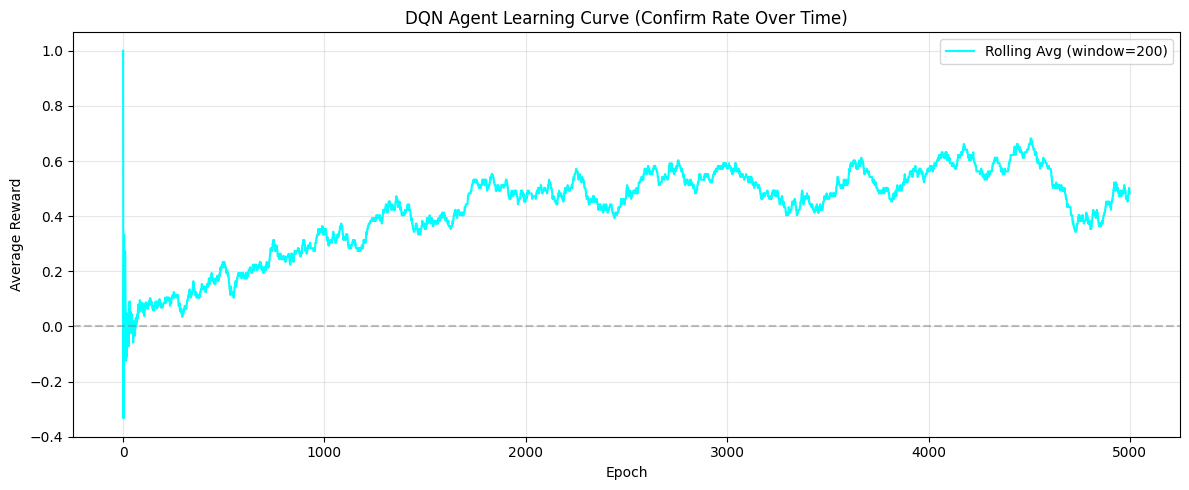

In [14]:
# --- TRAINING REWARD CURVE ---
# Visualize the Agent's learning progress over time
window = 200  # Rolling average window

rolling_avg = [
    np.mean(reward_tracking[max(0, i - window):i + 1])
    for i in range(len(reward_tracking))
]

plt.figure(figsize=(12, 5))
plt.plot(rolling_avg, color='cyan', linewidth=1.5, label=f'Rolling Avg (window={window})')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('Average Reward')
plt.title('DQN Agent Learning Curve (Confirm Rate Over Time)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
def evaluate_rl_model(environment_df, trained_agent, num_trials=500):
    print(f"Running True RL Evaluation over {num_trials} simulated sessions...\n")

    trained_agent.eval() # Inference mode (no exploring, purely exploiting)

    agent_confirms = 0
    hobby_confirms = 0
    random_confirms = 0

    valid_trials = 0

    with torch.no_grad():
        for _ in range(num_trials):
            target_idx = random.randint(0, len(environment_df) - 1)
            target_user = environment_df.iloc[target_idx]

            candidates = environment_df[
                (environment_df['user_id'] != target_user['user_id']) &
                (environment_df['gender'] == target_user['target_gender']) &
                (environment_df['target_gender'] == target_user['gender']) &
                (environment_df['location'] == target_user['location'])
            ]

            if len(candidates) == 0: continue
            valid_trials += 1

            agent_scores = []
            hobby_scores = []
            valid_candidate_list = []

            # 1. Rank all candidates
            for idx, cand in candidates.iterrows():
                state_vector, _ = process_pair(target_user, cand)

                if state_vector is not None:
                    valid_candidate_list.append(cand)

                    # Agent predicts Q-Value (Expected Reward)
                    state_tensor = torch.FloatTensor(state_vector).to(device)
                    q_val = trained_agent(state_tensor).item()
                    agent_scores.append(q_val)

                    # Hobby Baseline calculates Jaccard sum
                    hobby_overlap = sum(state_vector[5:])
                    hobby_scores.append(hobby_overlap)

            if not valid_candidate_list: continue

            # 2. Each strategy picks its absolute #1 Candidate
            agent_best_idx = np.argmax(agent_scores)
            hobby_best_idx = np.argmax(hobby_scores)
            random_best_idx = random.randint(0, len(valid_candidate_list) - 1)

            # 3. Expose picks to the Stochastic Environment (Did the user hit Confirm?)
            _, agent_reward = simulate_user_interaction(target_user, valid_candidate_list[agent_best_idx])
            _, hobby_reward = simulate_user_interaction(target_user, valid_candidate_list[hobby_best_idx])
            _, random_reward = simulate_user_interaction(target_user, valid_candidate_list[random_best_idx])

            # 4. Tally the Confirms (+1.0)
            if agent_reward == 1.0: agent_confirms += 1
            if hobby_reward == 1.0: hobby_confirms += 1
            if random_reward == 1.0: random_confirms += 1

    # Calculate Win Rates
    agent_win_rate = (agent_confirms / valid_trials) * 100
    hobby_win_rate = (hobby_confirms / valid_trials) * 100
    random_win_rate = (random_confirms / valid_trials) * 100

    print("-" * 50)
    print("🏆 TRUE RL EVALUATION (Confirm Rate %) 🏆")
    print("-" * 50)
    print(f"1. DRL Agent:      {agent_win_rate:.1f}% Confirm Rate")
    print(f"2. Hobby Baseline: {hobby_win_rate:.1f}% Confirm Rate")
    print(f"3. Random Guesser: {random_win_rate:.1f}% Confirm Rate")
    print("-" * 50)

# Run the stochastic evaluation
evaluate_rl_model(df, agent, num_trials=500)

Running True RL Evaluation over 500 simulated sessions...

--------------------------------------------------
🏆 TRUE RL EVALUATION (Confirm Rate %) 🏆
--------------------------------------------------
1. DRL Agent:      87.4% Confirm Rate
2. Hobby Baseline: 80.8% Confirm Rate
3. Random Guesser: 54.4% Confirm Rate
--------------------------------------------------


In [16]:
def find_best_matches(target_user_id, environment_df, trained_agent, top_n=5):
    """
    Takes a single user, filters the database, scores candidates using the AI,
    and returns the best matches.
    """

    # Switch the PyTorch model from 'Training' to 'Evaluation' mode
    # This turns off Dropout and optimizes for speed
    trained_agent.eval()

    # Get the target user's profile
    target_user = environment_df[environment_df['user_id'] == target_user_id].iloc[0]
    print(f"Finding matches.......")

    # STAGE 1: Candidate Generation (Database Hard Filters)
    # We drop the 1,000+ users down to a smaller pool to save computational power
    candidates = environment_df[
        (environment_df['user_id'] != target_user_id) &
        (environment_df['gender'] == target_user['target_gender']) &
        (environment_df['target_gender'] == target_user['gender']) &
        (environment_df['location'] == target_user['location']) # Must be in the same city
    ]

    print(f"Stage 1 Complete: Filtered down to {len(candidates)} viable candidates.")

    match_predictions = []

    # STAGE 2: Precision Ranking (The DRL Agent)
    # torch.no_grad() tells PyTorch NOT to calculate gradients (saves massive memory)
    with torch.no_grad():
        for index, candidate in candidates.iterrows():
            # Process the pair into the 16-feature State Tensor
            state_vector, _ = process_pair(target_user, candidate)

            if state_vector is not None:
                # Convert to Tensor and send to GPU
                state_tensor = torch.FloatTensor(state_vector).to(device)

                # The Agent predicts the Q-Value (Expected Reward)
                predicted_score = trained_agent(state_tensor).item()

                match_predictions.append({
                    'candidate_id': candidate['user_id'],
                    'occupation': candidate['occupation'],
                    'anxiety': candidate['anxiety'],
                    'avoidance': candidate['avoidance'],
                    'predicted_score': predicted_score
                })

    # Sort the results by the Agent's predicted score (Highest to Lowest)
    match_predictions.sort(key=lambda x: x['predicted_score'], reverse=True)

    return match_predictions[:top_n]


# 1. DELETE ANY EXISTING USER 9999 TO PREVENT DUPLICATES
df = df[df['user_id'] != 9999]

# 2. CREATE THE FIXED USER (Matching your database strings exactly)
test_user = {
    'user_id': 9999,
    'age': 23,
    'gender': 'Male',
    'target_gender': 'Female',
    'location': 'Galle',
    'occupation': 'Software Engineer',
    'anxiety': 1.5,
    'avoidance': 1.2,
    'Relationship Intent': json.dumps(['Long-Term Relationship']), # The Fix
    'Gaming & Digital': json.dumps(['PC Gaming', 'Game Dev']),
    'Intellectual & Learning': json.dumps(['Technology', 'Science']),
    'Personality & Values': json.dumps(['Logic-Driven', 'Honesty']),
    'Lifestyle': json.dumps(['Night Owl', 'Digital Nomad']),
    'Music': json.dumps(['EDM', 'Indie']),
    'Movies & Shows': json.dumps(['Sci-Fi']),
    'Food & Drinks': json.dumps(['Coffee Enthusiast']),
    'Sports & Outdoor': json.dumps(['Gym']),
    'Travel & Culture': json.dumps(['Backpacking']),
    'Arts & Creativity': json.dumps(['Creative Writing'])
}

# 3. INJECT THE FRESH USER
df = pd.concat([df, pd.DataFrame([test_user])], ignore_index=True)

# 4. RE-RUN THE MATCHMAKER
top_matches = find_best_matches(target_user_id=9999, environment_df=df, trained_agent=agent, top_n=5)

print("\n--- NEW TOP 5 MATCHES ---")
for i, match in enumerate(top_matches):
    print(f"#{i+1} | User {match['candidate_id']:<4} | {match['occupation']:<20} | Score: {match['predicted_score']:.2f} | Anx: {match['anxiety']:.1f}, Avo: {match['avoidance']:.1f}")

Finding matches.......
Stage 1 Complete: Filtered down to 47 viable candidates.

--- NEW TOP 5 MATCHES ---
#1 | User 1179.0 | Doctor               | Score: 0.85 | Anx: 1.0, Avo: 5.8
#2 | User 189.0 | Lawyer               | Score: 0.84 | Anx: 3.2, Avo: 3.3
#3 | User 400.0 | Business Owner       | Score: 0.83 | Anx: 1.0, Avo: 4.2
#4 | User 780.0 | Chef                 | Score: 0.83 | Anx: 1.0, Avo: 4.5
#5 | User 864.0 | Bank Officer         | Score: 0.82 | Anx: 1.0, Avo: 4.0


In [ ]:
# Define the file path for the True RL model
rl_model_path = 'matchmind_true_rl_agent.pth'

# Save the model's internal state
torch.save(agent.state_dict(), rl_model_path)

print(f"True RL Model secured! Option B saved to: {rl_model_path}")

In [22]:
# ============================================================
# 5-Fold User-Level Cross-Validation with Experience Replay
# ============================================================
# This mirrors the main training loop exactly:
# - Experience Replay Buffer (deque, batch sampling)
# - StepLR Learning Rate Scheduler
# - Slower epsilon decay (0.999)
# ============================================================

EPOCHS_PER_FOLD = 2000
NUM_SPLITS = 5
EVAL_TRIALS = 200
BATCH_SIZE = 64

unique_users = df['user_id'].unique()
kf = KFold(n_splits=NUM_SPLITS, shuffle=True, random_state=42)

cv_confirm_rates = []

print(f"Starting {NUM_SPLITS}-Fold User-Level Cross Validation (with Experience Replay)...\n")

for fold, (train_idx, test_idx) in enumerate(kf.split(unique_users)):
    print(f"--- FOLD {fold + 1}/{NUM_SPLITS} ---")

    # 1. Split the Environment (Users)
    train_users = unique_users[train_idx]
    test_users = unique_users[test_idx]

    df_train = df[df['user_id'].isin(train_users)]
    df_test = df[df['user_id'].isin(test_users)]

    # 2. Initialize a FRESH Agent, Optimizer, Scheduler, and Replay Buffer
    cv_agent = MatchmakerDQN().to(device)
    optimizer = optim.Adam(cv_agent.parameters(), lr=0.001)
    scheduler = StepLR(optimizer, step_size=600, gamma=0.5)  # Adjusted for 2000 epochs per fold
    criterion = nn.MSELoss()
    cv_memory = deque(maxlen=10000)

    epsilon = 1.0
    epsilon_decay = 0.999  # Slower decay to match main training
    epsilon_min = 0.05

    # 3. TRAIN on the Train Environment (df_train) with Experience Replay
    cv_agent.train()
    for epoch in range(EPOCHS_PER_FOLD):
        target_idx = random.randint(0, len(df_train) - 1)
        target_user = df_train.iloc[target_idx]

        candidates = df_train[
            (df_train['user_id'] != target_user['user_id']) &
            (df_train['gender'] == target_user['target_gender']) &
            (df_train['target_gender'] == target_user['gender']) &
            (df_train['location'] == target_user['location'])
        ]

        if len(candidates) == 0: continue

        feed_candidates = candidates.sample(min(10, len(candidates)))
        feed_states, valid_cands = [], []

        for _, cand in feed_candidates.iterrows():
            state, _ = process_pair(target_user, cand)
            if state is not None:
                feed_states.append(state)
                valid_cands.append(cand)

        if not feed_states: continue

        state_tensors = torch.FloatTensor(np.array(feed_states)).to(device)

        # Epsilon-Greedy Action
        if random.random() < epsilon:
            chosen_idx = random.randint(0, len(feed_states) - 1)
        else:
            with torch.no_grad():
                q_values = cv_agent(state_tensors)
                chosen_idx = torch.argmax(q_values).item()

        chosen_cand = valid_cands[chosen_idx]

        # Environment Feedback
        _, actual_reward = simulate_user_interaction(target_user, chosen_cand)

        # Store in Experience Replay Buffer
        cv_memory.append((feed_states[chosen_idx], actual_reward))

        # Batch Learning from Replay Buffer
        if len(cv_memory) >= BATCH_SIZE:
            minibatch = random.sample(cv_memory, BATCH_SIZE)
            batch_states = torch.FloatTensor(np.array([m[0] for m in minibatch])).to(device)
            batch_rewards = torch.FloatTensor([[m[1]] for m in minibatch]).to(device)

            optimizer.zero_grad()
            predicted_q = cv_agent(batch_states)
            loss = criterion(predicted_q, batch_rewards)
            loss.backward()
            optimizer.step()

        # Step scheduler and decay epsilon
        scheduler.step()
        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

    # 4. EVALUATE on the Unseen Test Environment (df_test)
    cv_agent.eval()
    agent_confirms = 0
    valid_evals = 0

    with torch.no_grad():
        for _ in range(EVAL_TRIALS):
            target_idx = random.randint(0, len(df_test) - 1)
            target_user = df_test.iloc[target_idx]

            candidates = df_test[
                (df_test['user_id'] != target_user['user_id']) &
                (df_test['gender'] == target_user['target_gender']) &
                (df_test['target_gender'] == target_user['gender']) &
                (df_test['location'] == target_user['location'])
            ]

            if len(candidates) == 0: continue
            valid_evals += 1

            agent_scores = []
            valid_eval_cands = []

            for _, cand in candidates.iterrows():
                state_vector, _ = process_pair(target_user, cand)
                if state_vector is not None:
                    valid_eval_cands.append(cand)
                    state_tensor = torch.FloatTensor(state_vector).to(device)
                    agent_scores.append(cv_agent(state_tensor).item())

            if not valid_eval_cands: continue

            best_idx = np.argmax(agent_scores)
            _, reward = simulate_user_interaction(target_user, valid_eval_cands[best_idx])

            if reward == 1.0: agent_confirms += 1

    # Record the Win Rate for this fold
    win_rate = (agent_confirms / valid_evals) * 100 if valid_evals > 0 else 0
    cv_confirm_rates.append(win_rate)
    print(f"Fold {fold + 1} Unseen Confirm Rate: {win_rate:.1f}%\n")

# Final Cross-Validated Metrics
print("=" * 40)
print(f"FINAL CROSS-VALIDATION RESULTS (5 Folds)")
print("=" * 40)
for i, rate in enumerate(cv_confirm_rates):
    print(f"Fold {i+1}: {rate:.1f}%")
print("-" * 40)
print(f"Average Generalization Confirm Rate: {np.mean(cv_confirm_rates):.1f}%")
print(f"Standard Deviation (Stability):      +/-{np.std(cv_confirm_rates):.1f}%")
print("=" * 40)

Starting 5-Fold User-Level Cross Validation (with Experience Replay)...

--- FOLD 1/5 ---
Fold 1 Unseen Confirm Rate: 80.0%

--- FOLD 2/5 ---
Fold 2 Unseen Confirm Rate: 82.5%

--- FOLD 3/5 ---
Fold 3 Unseen Confirm Rate: 75.5%

--- FOLD 4/5 ---
Fold 4 Unseen Confirm Rate: 75.5%

--- FOLD 5/5 ---
Fold 5 Unseen Confirm Rate: 77.0%

FINAL CROSS-VALIDATION RESULTS (5 Folds)
Fold 1: 80.0%
Fold 2: 82.5%
Fold 3: 75.5%
Fold 4: 75.5%
Fold 5: 77.0%
----------------------------------------
Average Generalization Confirm Rate: 78.1%
Standard Deviation (Stability):      +/-2.7%
